In [24]:
import os
import zipfile



In [25]:
base_dir = 'Dataset/archive/brain_tumor_dataset'
train_dir = os.path.join('Dataset/archive/brain_tumor_dataset', 'train')
valid_dir = os.path.join('Dataset/archive/brain_tumor_dataset', 'val')


In [26]:
no_dir = os.path.join(base_dir, 'no')
yes_dir = os.path.join(base_dir, 'yes')

In [27]:
no_train = os.path.join(train_dir, 'no')
no_valid = os.path.join(valid_dir, 'no')

yes_train = os.path.join(train_dir, 'yes')
yes_valid = os.path.join(valid_dir, 'yes')

In [28]:
list_directory = [train_dir,valid_dir,no_train,no_valid,yes_train,yes_valid]
for f in list_directory:
  if not os.path.exists(f):
    os.mkdir(f)
    print('success %s' %(f))
  else:
    print('fail %s' %(f))

fail Dataset/archive/brain_tumor_dataset\train
fail Dataset/archive/brain_tumor_dataset\val
fail Dataset/archive/brain_tumor_dataset\train\no
fail Dataset/archive/brain_tumor_dataset\val\no
fail Dataset/archive/brain_tumor_dataset\train\yes
fail Dataset/archive/brain_tumor_dataset\val\yes


In [29]:
from sklearn.model_selection import train_test_split

no_train_dir, no_val_dir = train_test_split(os.listdir(no_dir), test_size=0.4, train_size = 0.6)
yes_train_dir, yes_val_dir = train_test_split(os.listdir(yes_dir), test_size=0.4, train_size = 0.6)


In [30]:
import shutil
for file in no_train_dir:
  shutil.copy(os.path.join(no_dir, file), os.path.join(no_train, file))
for file in yes_train_dir:
  shutil.copy(os.path.join(yes_dir, file), os.path.join(yes_train, file))
for file in no_val_dir:
  shutil.copy(os.path.join(no_dir, file), os.path.join(no_valid, file))
for file in yes_val_dir:
  shutil.copy(os.path.join(yes_dir, file), os.path.join(yes_valid, file))

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

In [32]:
train_generator = train_datagen.flow_from_directory(
    'Dataset/archive/brain_tumor_dataset/train',
    classes = ['no','yes'],
    target_size=(150,150),
    batch_size = 120,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    'Dataset/archive/brain_tumor_dataset/val',
    classes = ['no','yes'],
    target_size=(150,150),
    batch_size=19,
    class_mode='binary',
    shuffle=False
)

Found 252 images belonging to 2 classes.
Found 244 images belonging to 2 classes.


In [33]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(22, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 22)        25366     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 22)      

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [37]:
model.fit(
      train_generator,
      steps_per_epoch = 2, 
      epochs = 25,
      validation_data = validation_generator,
      validation_steps = 5,
      verbose = 2
)

Epoch 1/25
2/2 - 16s - loss: 0.7391 - accuracy: 0.3712 - val_loss: 0.6621 - val_accuracy: 0.9684 - 16s/epoch - 8s/step
Epoch 2/25
2/2 - 12s - loss: 0.7022 - accuracy: 0.4167 - val_loss: 0.6624 - val_accuracy: 0.9789 - 12s/epoch - 6s/step
Epoch 3/25
2/2 - 11s - loss: 0.6937 - accuracy: 0.4091 - val_loss: 0.6767 - val_accuracy: 0.7789 - 11s/epoch - 5s/step
Epoch 4/25
2/2 - 11s - loss: 0.6792 - accuracy: 0.8106 - val_loss: 0.6815 - val_accuracy: 0.5474 - 11s/epoch - 5s/step
Epoch 5/25
2/2 - 11s - loss: 0.6620 - accuracy: 0.6364 - val_loss: 0.6312 - val_accuracy: 0.6211 - 11s/epoch - 5s/step
Epoch 6/25
2/2 - 11s - loss: 0.6052 - accuracy: 0.8409 - val_loss: 0.8598 - val_accuracy: 0.3158 - 11s/epoch - 5s/step
Epoch 7/25
2/2 - 11s - loss: 0.5734 - accuracy: 0.7045 - val_loss: 0.2787 - val_accuracy: 0.9263 - 11s/epoch - 5s/step
Epoch 8/25
2/2 - 11s - loss: 0.6693 - accuracy: 0.5758 - val_loss: 0.8995 - val_accuracy: 0.4947 - 11s/epoch - 5s/step
Epoch 9/25
2/2 - 11s - loss: 0.5304 - accuracy: 

In [38]:
from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [39]:
model.evaluate(validation_generator)

13/13 [==============================] - 6s 458ms/step - loss: 0.4273 - accuracy: 0.8197


[0.427310973405838, 0.8196721076965332]

In [40]:
STEP_SIXE_TEST = validation_generator.n / validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,verbose=1)

13/13 [==============================] - 6s 458ms/step


In [41]:
fpr,tpr,_=roc_curve(validation_generator.classes,preds)

In [42]:
fpr,tpr,_=roc_curve(validation_generator.classes,preds)

In [43]:
roc_auc=auc(fpr,tpr)

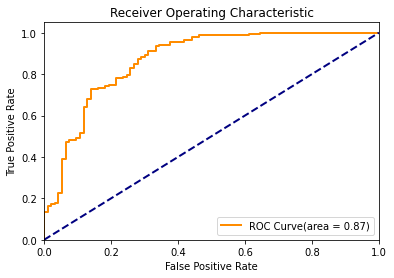

In [44]:
import matplotlib.pyplot as plt

plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',
         lw=lw,label='ROC Curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
model.save('model_1.h5')

In [ ]:
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np
import files
from keras.preprocessing import image

upload = files.upload()

for fn in upload.keys():

  path = '/content/'+fn
  img = image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size =10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn+"no")
  else:
    print(fn+"yes")